In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Total por organismo
#grouped = df.groupby('Organismo')
#print(grouped['TOTAL'].sum().sort_values(ascending=False).reset_index())

# Total por comunidad autónoma
#grouped = df.groupby('CCAA ')
#print(grouped.REFERENCIA.nunique().sort_values(ascending=False))

# Total por género
#grouped = df.groupby('GENERO')
#print(grouped.REFERENCIA.nunique().sort_values(ascending=False))

# Total por programa y subprograma
#grouped = df.groupby(['PR.'])
#print(grouped.REFERENCIA.nunique().sort_values(ascending=False))

# Dataframe ordenado por coste total
#print(df[['CONV.','REFERENCIA','Organismo', 'TOTAL', 'TITULO']].sort_values(by=['TOTAL'], ascending=False))

# Cuenta por palabra clave
grouped = df.groupby(['PALABRA CLAVE'])
print(grouped.REFERENCIA.nunique().sort_values(ascending=False))

NameError: name 'df' is not defined

In [2]:
def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [3]:
proyectos = read_csv("data/mapeo_proyectos.csv")
investigadores = read_csv("data/mapeo_investigadores.csv")
recursos = read_csv("data/mapeo_recursos.csv")

In [4]:
# pd.to_numeric(df.Financiación)

In [5]:
# Total por organismo
grouped = proyectos.groupby('Entidad financiadora')
print(grouped['Financiación'].sum().sort_values(ascending=False).reset_index())

                                 Entidad financiadora  \
0                                            La Caixa   
1   La Caixa, Asociación Catalana de Universidades...   
2                                      Fundación BBVA   
3          Gobierno de Canarias, Unión europea (RIS3)   
4   Comisión Interministerial de Ciencia y Tecnología   
5                                               FECYT   
6                                    Xunta de Galicia   
7                              Generalitat Valenciana   
8   Dirección General de Investigación Científica ...   
9                               Ministerio de Ciencia   
10                                       MediaLab UGR   
11                             Real Academia Española   
12  Comisión Interministerial de Ciencia y Tecnolo...   
13                                 Junta de Andalucía   
14                           DIRECCIÓN XERAL DE I+D+I   
15  Comisión Interministerial de Ciencia y Tecnolo...   
16  Fondo Europeo de Desarrollo

In [7]:
df = pd.read_excel("data/HUMANIDADES DIGITALES_APROBADO_REVISADO_MT.xlsx", 0)

In [8]:
grouped = df.groupby('Organismo')
print(grouped['TOTAL'].sum().sort_values(ascending=False).reset_index())

                                            Organismo      TOTAL
0                            UNIVERSIDAD DE BARCELONA  869530.00
1   AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...  856400.00
2              UNIVERSIDADE DE SANTIAGO DE COMPOSTELA  649371.09
3                     CENTRO DE VISION POR COMPUTADOR  639844.00
4                   UNIVERSIDAD COMPLUTENSE DE MADRID  590418.00
5                            UNIVERSIDAD DE SALAMANCA  498276.00
6                              UNIVERSIDAD DE GRANADA  470130.00
7                              UNIVERSIDAD DE SEVILLA  455270.00
8                              UNIVERSIDADE DA CORUÑA  440752.00
9       UNIVERSIDAD NACIONAL DE EDUCACION A DISTANCIA  429607.00
10                            UNIVERSIDAD DE VALENCIA  397028.00
11                  UNIVERSIDAD AUTONOMA DE BARCELONA  386595.00
12                             UNIVERSIDAD DE CORDOBA  360720.00
13                  UNIVERSIDAD POLITECNICA DE MADRID  319861.00
14                       

In [9]:
# Total por comunidad autónoma
ccaa = df.groupby('CCAA ')
result = ccaa.REFERENCIA.nunique().sort_values(ascending=False).reset_index()
result.columns = ["CCAA", "total"]
print(result)


                  CCAA  total
0             CATALUÑA     61
1               MADRID     55
2            ANDALUCIA     37
3              GALICIA     23
4         C.VALENCIANA     21
5      CASTILLA Y LEON     15
6               ARAGON      6
7               MURCIA      4
8            CANTABRIA      4
9             CANARIAS      4
10        PDO.ASTURIAS      4
11            LA RIOJA      3
12  CASTILLA-LA MANCHA      3
13            BALEARES      2
14             NAVARRA      1
15         EXTREMADURA      1
16          PAIS VASCO      1


In [10]:
# Total por género
grouped = df.groupby('GENERO')
result = grouped.REFERENCIA.nunique().sort_values(ascending=False).to_frame().reset_index()
result.columns = ["género", "total"]
print(result)

      género  total
0  Masculino    144
1   Femenino    101


In [11]:
# Total por programa y subprograma
grouped = df.groupby(['PR.'])
print(grouped.REFERENCIA.nunique().sort_values(ascending=False))

PR.
FFI     76
HAR     61
TIN     35
HUM     19
TIC     10
FLA     10
PHA      7
CSO      5
TSI      4
BHA      4
SEJ      4
FEM      2
EDU      2
CGL      2
MLP      1
TEC      1
BIA      1
FLA      1
Name: REFERENCIA, dtype: int64


In [12]:
# Cuenta por palabra clave
grouped = df.groupby(['PALABRA CLAVE'])
print(grouped.REFERENCIA.nunique().sort_values(ascending=False))

PALABRA CLAVE
HUMANIDADES DIGITALES        61
SIG                          44
BIBLIOTECAS DIGITALES        32
XML                          29
TIC                          24
LINGÜÍSTICA COMPUTACIONAL    22
WEB SEMANTICA                15
ONTOLOGIAS Y ONTOLOGI%        8
TEI                           5
SPARQL                        2
DIGITAL HUMANITIES            2
PATRIMONIO DIGITAL            1
HISTORIA DIGITAL              1
Name: REFERENCIA, dtype: int64


In [13]:
# por género en hd
filter1 = df["PALABRA CLAVE"]=="HUMANIDADES DIGITALES"
data = df
data.where(filter1, inplace=True)
grouped = data.groupby('GENERO')
result = grouped.REFERENCIA.nunique().sort_values(ascending=False).to_frame().reset_index()
result.columns = ["género", "total"]
print(result)
result.to_csv(r'data/genero_hd',index=False)


      género  total
0   Femenino     33
1  Masculino     28


In [14]:
# Cómo ha evolucionado la financiación en el tiempo: ¿hay ahora más recursos económicos que hace 10 años?
proyectos = pd.read_csv("data/mapeo_proyectos2.csv")

proyectos.columns = ['ID', 'titulo', 'codigo', 'desc', 'temas', 'inicio', 'fin', 'hd', 'convocatoria', 
                     'financiacion', 'entidad', 'web', 'investigadores', 'ID_inv', 'fuente',
                     'estado', 'fecha_pub', 'ultima_act']
proyectos["inicio"] = pd.to_numeric(proyectos["inicio"], errors='coerce')
proyectos["fin"] = pd.to_numeric(proyectos["fin"], errors='ignore')
proyectos["financiacion"] = pd.to_numeric(proyectos["financiacion"], errors='coerce')

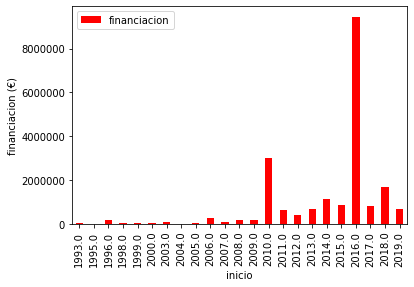

In [15]:
# Cómo ha evolucionado la financiación en el tiempo: ¿hay ahora más recursos económicos que hace 10 años?
grouped = proyectos.groupby("inicio")
df2 = grouped.financiacion.sum().reset_index()
df2.plot(kind='bar',x='inicio',y='financiacion',color='red')
plt.ylabel('financiacion (€)')
plt.show()

In [17]:
# % de investigadores en HD sobre el total de investigadores en España
investigadores.columns = ['ID', 'Nombre', 'Descripción', 'Universidad', 'Dep', 'Grupo_Inv', 'Latitude', 'Longitude', 
                          'Temas', 'Dialnet', 'Facebook', 'GoogleScholar', 'ResearchGate', 'Twitter', 'Web', 'Fuente', 
                          'Fecha_pub', 'ult_act', 'Estado']
investigadores.Temas.nunique()


ValueError: Length mismatch: Expected axis has 21 elements, new values have 19 elements

In [19]:
# Financiación media de los proyectos en HD y por área de conocimiento 


In [18]:
df2

,inicio,financiacion
0,1993.0,16828.0
1,1995.0,12439.0
2,1996.0,172191.0
3,1998.0,40238.0
4,1999.0,55894.0
5,2000.0,30050.0
6,2003.0,85880.0
7,2004.0,0.0
8,2005.0,53550.0
9,2006.0,274670.0


In [19]:
#mapa investigadores
coords = investigadores.iloc[:,6:8]
coords["Latitude"] = pd.to_numeric(coords["Latitude"], errors='coerce')
coords["Longitude"] = pd.to_numeric(coords["Longitude"], errors='coerce')


KeyError: 'Longitude'

In [56]:
coords.Longitude.min()

-100.9816995

In [57]:
coords.Longitude.max()

18.057830999999965

In [58]:
coords.Latitude.min()

25.4391457

In [59]:
coords.Latitude.max()

59.36217370000001

In [55]:
BBox = ((coords.Longitude.min(), coords.Longitude.max(), coords.Latitude.min(), coords.Latitude.max())

SyntaxError: unexpected EOF while parsing (<ipython-input-55-9c0e61dd1022>, line 1)